## Linear Regression
With Seaborn and Scikit-Learn

In [79]:
# Open the database
import pandas as pd   # pandas dataframes
import seaborn as sns # visualization library
import matplotlib.pyplot as plt # core viz library

vstar = pd.read_csv('vsx.csv')
vstar.head(10)

,iod,name,code,type,mag_min,mag_max,period,ra,dec
0,270915,VSX J000000.6+620044,0,SR,12.300,12.550,68.000000,0.00271,62.01222
1,195,GM And,0,RRAB,12.430,13.300,0.706758,0.01521,35.36286
2,287959,CSS_J000004.0+182425,0,RRAB,15.171,0.970,0.485160,0.01669,18.40698
3,275753,Mis V1378,0,SR,11.400,12.700,NaN,0.01717,57.10467
4,170899,UNSW-V 312,0,EA,13.630,0.066,1.057620,0.02500,-59.74675
5,64625,V0467 And,0,EW,15.210,15.610,0.353539,0.02721,35.36692
6,25131,Z Peg,0,M,7.300,13.600,320.000000,0.02733,25.88647
7,251805,V1023 Cas,0,RRAB,18.130,18.750,0.643700,0.02771,56.65331
8,25281,EP Peg,0,SR,10.700,11.400,340.000000,0.02875,20.23736
9,25257,DM Peg,0,EA/D:,10.800,11.600,2.588991,0.03037,18.73808


In [80]:
# Compute amplitude and filter for amplitude < 0 
# also drop any rows with missing values
vstar['amplitude'] = vstar.mag_max - vstar.mag_min
vstar = vstar[vstar.amplitude > 0]
vstar = vstar.dropna()


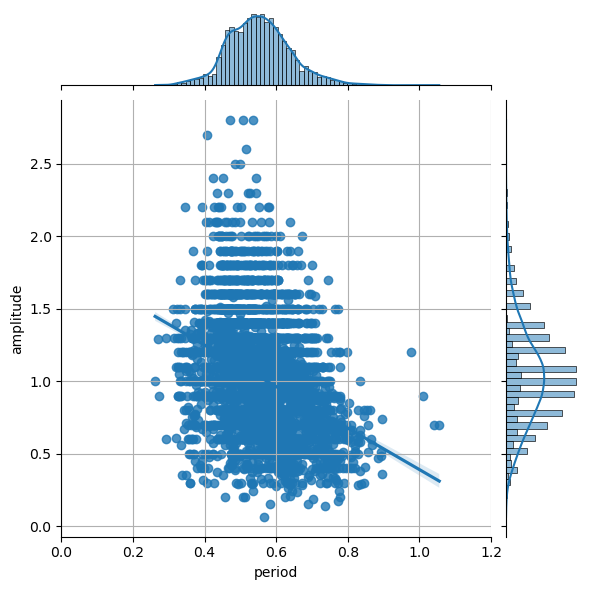

In [81]:
# seaborn joint plot
# period vs amplitude 
# See online docs for more information: https://seaborn.pydata.org/generated/seaborn.jointplot.html
the_type  = 'RRAB'
sel = vstar[vstar.type == the_type]
sel.head(10)
sns.jointplot(sel, x='period', y='amplitude',  kind='reg')
plt.xlim(0.0, 1.2)
plt.grid()

In [82]:
# Using scikit learn for linear regression
from sklearn import linear_model as lm

regr = lm.LinearRegression()
regr.fit(sel[['period']], sel.amplitude)
y_intercept = regr.intercept_
coef = regr.coef_
print("Slope: ", coef)
print("Y-Intercept: ", y_intercept)

Slope:  [-1.43175056]
Y-Intercept:  1.8207990459892012
